In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Overview of the Dataset

There are 17 variable, including 16 features and the class variable. A description of all the features in the dataset is well given in the data source which can be found from the UCI Machine Learning Repository.
When observing the dataset, we can see that the dataset contains categorical nominal values (such as job, marital status, housing loan availability etc.), categorical ordinal values (such as education, where an order can be identified from lowest point to higher point), and finally, discrete and continuous values.
Checking the class value counts to get an idea how many classes are there and how many values are there for each class label in the dataset.

In [2]:
df = pd.read_csv('as1-bank.csv') 
df.head(5)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes


In [3]:
df.describe()

,age,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,0.800179,1.206707,1552.343280,0.074598,261.290615,2.064269,223.252869,3.184264,0.626498
std,11.282964,0.621418,0.649716,3084.580003,0.262759,236.203272,1.566109,111.830127,4.614190,0.824863
min,18.000000,0.000000,0.000000,-1884.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,0.000000,1.000000,162.000000,0.000000,113.000000,1.000000,133.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,595.000000,0.000000,194.000000,2.000000,195.000000,2.000000,0.000000
75%,47.000000,1.000000,2.000000,1733.750000,0.000000,324.000000,2.000000,326.000000,4.000000,1.000000
max,89.000000,2.000000,2.000000,81204.000000,1.000000,2219.000000,16.000000,871.000000,275.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   marital    7842 non-null   int64 
 2   education  7842 non-null   int64 
 3   default    7842 non-null   object
 4   balance    7842 non-null   int64 
 5   housing    7842 non-null   object
 6   loan       7842 non-null   object
 7   contact    7842 non-null   int64 
 8   duration   7842 non-null   int64 
 9   campaign   7842 non-null   int64 
 10  pdays      7842 non-null   int64 
 11  previous   7842 non-null   int64 
 12  poutcome   7842 non-null   int64 
 13  y          7842 non-null   object
dtypes: int64(10), object(4)
memory usage: 857.8+ KB


In [5]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
df['y'].value_counts()

no     6056
yes    1786
Name: y, dtype: int64

## 2. Preprocessing Data

Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.

Checking for Missing values

In [6]:
# check for missing values in any column
df.isnull().any()

age          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
# total sum of missing values for each attributes
print(df.isnull().sum())

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('as1-bank.csv', na_values = missing_values)

print(new_data.isnull().sum())

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## Handling Outliers

We check for outliers only in the features that contain numerical values.

Checking the 'age' feature for outliers

In [9]:
df_cont = df.select_dtypes(include = np.number)
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        7842 non-null   int64
 1   marital    7842 non-null   int64
 2   education  7842 non-null   int64
 3   balance    7842 non-null   int64
 4   contact    7842 non-null   int64
 5   duration   7842 non-null   int64
 6   campaign   7842 non-null   int64
 7   pdays      7842 non-null   int64
 8   previous   7842 non-null   int64
 9   poutcome   7842 non-null   int64
dtypes: int64(10)
memory usage: 612.8 KB


In [10]:
# Check global outliers using 0.1 quantile and 0.9 quantile
min_p = df_cont.quantile(0.1)
max_p = df_cont.quantile(0.9)

# Column vs Number of Outliers
((df_cont <= min_p) | (df_cont >= max_p)).sum()

age          1730
marital      3341
education    3645
balance      1689
contact      7842
duration     1584
campaign     4792
pdays        1610
previous     3647
poutcome     6429
dtype: int64

Age Shape: (7842, 14)


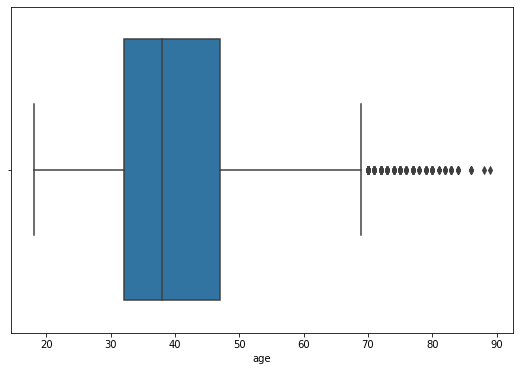

In [11]:

fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",df.shape)
## Max and Min Quantile
max_val = df.age.quantile(0.75)
min_val = df.age.quantile(0.25)

sns.boxplot(df['age'])
plt.show()

When checking the boxplot for the age feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

Checking the balance feature for outliers

Before: (7842, 14)


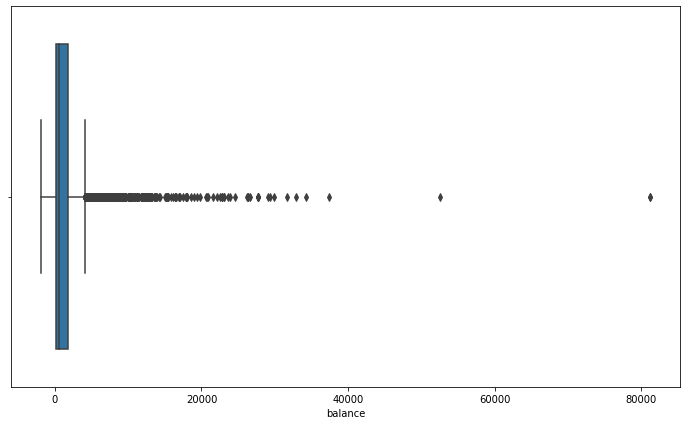

In [12]:
fig, axes = plt.subplots(figsize=(12, 7))
# Checking data outlier for balance feature
print("Before:",df.shape)
sns.boxplot(df['balance'])
plt.show()

When checking the above visualized boxplot for the balance feature, we can see that eventhough there are many data points outside the boxplot as in the age boxplot, we can point out a range where the datapoints start to spread wider. Therefore, i will manually set the cutoff region for outliers as balance < -5000 and balance > 35000, which is purely out of my discretion.

After: (7838, 14)


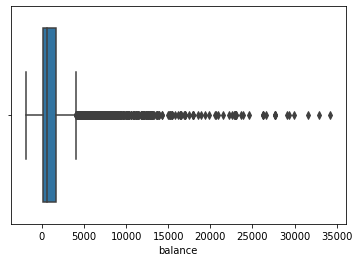

In [13]:
# removing data outliers which values greater than 35 000 and less than 5000
df = df[(df['balance']>-5000) & (df['balance']<35000)]
print("After:",df.shape)
sns.boxplot(df['balance'])
plt.show()

Duration Shape: (7838, 14)


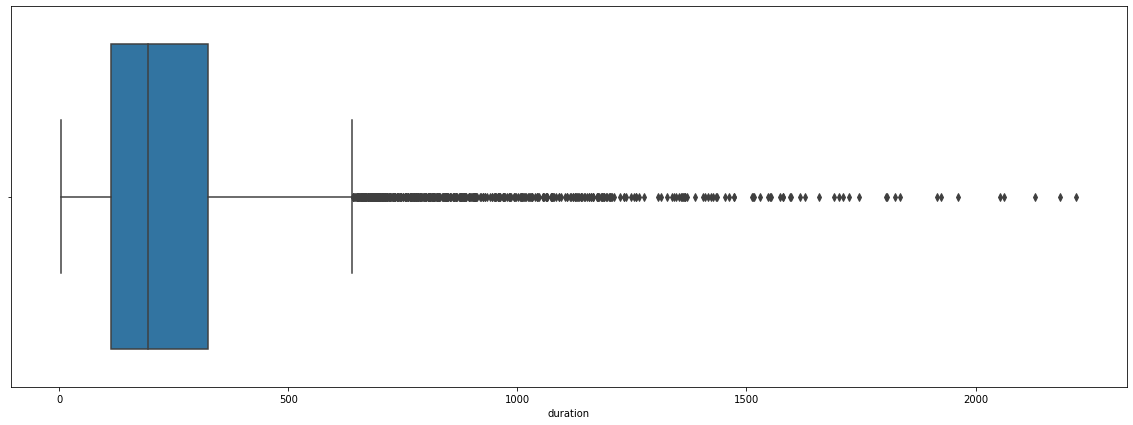

In [14]:
## Checking data outliers for duration feature

fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for duration feature
print("Duration Shape:",df.shape)
## Max and Min Quantile
max_val = df.balance.quantile(0.75)
min_val = df.balance.quantile(0.25)

sns.boxplot(df['duration'])
plt.show()

When checking the above box plot, we can see that, there a significant gap has first occured around the duration value 1300. Therefore i decided to clear the datapoints after duration 1300 as handling outliers in this feature.

After Duration Shape: (7780, 14)


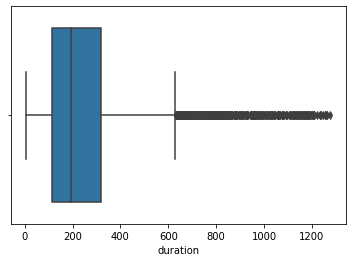

In [15]:
# removing datapoints that have duration values greater than 2600
df = df[(df['duration']<1300)]

print("After Duration Shape:",df.shape)

sns.boxplot(df['duration'])
plt.show()

Checking outliers in campaign feature

Before: (7780, 14)


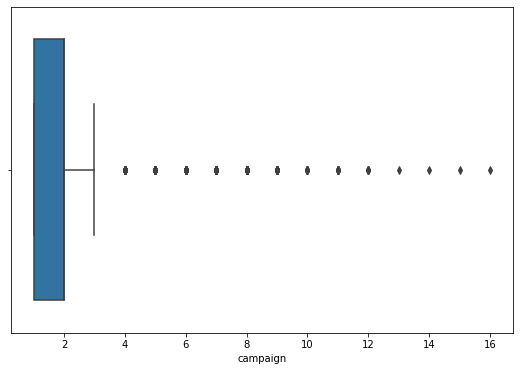

In [16]:
fig, axes = plt.subplots(figsize=(9, 6))

## Checking data outliers for campaign attribute
print("Before:",df.shape)
sns.boxplot(df['campaign'])
plt.show()

When checking the boxplot visualization, we can see that a break has occured in the datapoints outside the boxplot aroung the campaign count 40. Therefore, i will be clearing the datapoints that has campaign contact count more than 16.

After: (7779, 14)


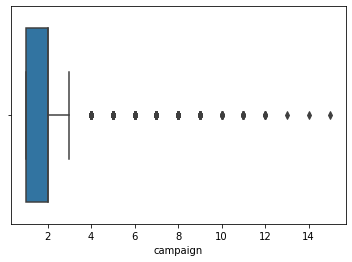

In [17]:
# removing data outliers that which values greater than 16
df = df[(df['campaign']<16)]

print("After:",df.shape)

sns.boxplot(df['campaign'])
plt.show()

Checking outliers in pdays feature

Before: (7779, 14)


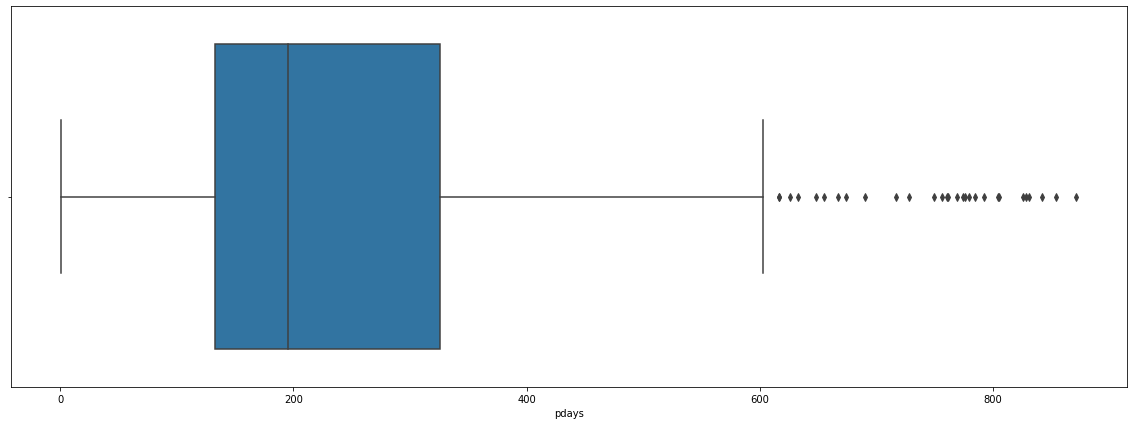

In [18]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking data outliers for pdays feature
print("Before:",df.shape)
sns.boxplot(df['pdays'])
plt.show()

We can see that the values has started breaking from a point aroung 600 pdays. Therefore i will be removing the outliers after pdays = 600

After: (7749, 14)


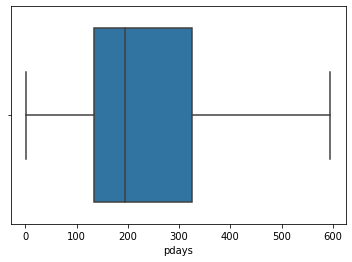

In [19]:
# removing data outliers that which values greater than 600
df = df[(df['pdays']<600)]

print("After:",df.shape)

sns.boxplot(df['pdays'])
plt.show()

Checking outliers in the previous feature

Before: (7749, 14)


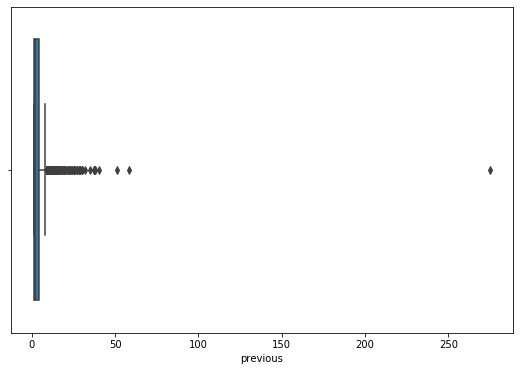

In [20]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the data outliers for previous feature
print("Before:",df.shape)
sns.boxplot(df['previous'])
plt.show()

We can see 3 clear outliers after 50 range. Therefore, i will be removing outliers after previous = 50.

After: (7746, 14)


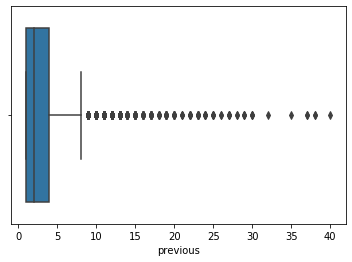

In [21]:
# removing data outliers which values greater than 50
df = df[(df['previous']<50)]

print("After:",df.shape)

sns.boxplot(df['previous'])
plt.show()

Now, after careful inspection of all the numerical fields (features) in the dataset, i have removed outliers and the remaining number datapoints of datapoints is 7804. Therefore, we have removed 7842 - 7804 = 38 outliers.

## Feature Enoding

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.

Removing Unwanted Features

The feature duration contains last contact duration, in seconds.

As said by the data source, this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, i have decided to remove the feature duration from the dataset used for prediction.

In [22]:
## removing duration feature
df.drop(['duration'], inplace=True, axis = 1)



In [23]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,1,143,3,0,yes


## Feature Enoding

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.

In [24]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
df['y'] = LabelEncoder().fit_transform(df['y'])
df['y']

0       0
1       1
2       1
3       0
4       1
       ..
7837    0
7838    1
7839    1
7840    1
7841    0
Name: y, Length: 7746, dtype: int64

There was one feature that can be considered as having Categorical Ordinal data type; education. This is because when considering the values present in this field, an order can be seen as secondary, tertiary etc. This feature was converted to numerical representation using mapping as follows.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
df['education'].value_counts()



1    4149
2    2591
0    1006
Name: education, dtype: int64

In [26]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,1,151,3,0,0
1,42,0,1,no,-247,yes,yes,1,1,166,1,2,1
2,33,1,1,no,3444,yes,no,1,1,91,4,0,1
3,36,1,2,no,2415,yes,no,1,1,86,4,2,0
4,36,1,2,no,0,yes,no,1,1,143,3,0,1


In [27]:
# OneHoteEncoding using pandas ,get_dummies function 
# listing attributes that has categorical data
categorial_features = ['default', 'housing', 'loan']
for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    df1 = pd.get_dummies(df[item], prefix=item)
    df = df.drop(item, axis=1)
    for categorial_feature in df1.columns:
        df[categorial_feature] = df1[categorial_feature]

In [28]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    df.replace({item:bin_dict},inplace=True)

In [29]:
# rearrange the columns in the dataset to contain the y value

cols = list(df.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
df = df[cols+['y']] # new dataframe with columns in new order

In [30]:
## Splitting the Data
y = df['y']
X = df.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

The above code fragment was written because while encoding the categorical data using OneHotEncoding, the new columns were appended to the end of the dataset and the y (target) column was not at the end anymore.

In [31]:
# checking the final info about the dataset 
df.describe()

,age,marital,education,balance,contact,campaign,pdays,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y
count,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000
mean,40.755487,0.799639,1.204622,1522.193003,0.073715,2.064291,221.142138,3.130777,0.628066,0.992770,0.007230,0.369481,0.630519,0.860444,0.139556,0.223728
std,11.259099,0.621649,0.650041,2731.413601,0.261324,1.561892,107.195996,3.290900,0.825001,0.084724,0.084724,0.482695,0.482695,0.346548,0.346548,0.416769
min,18.000000,0.000000,0.000000,-1884.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,159.000000,0.000000,1.000000,133.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,1.000000,1.000000,589.000000,0.000000,2.000000,194.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,47.000000,1.000000,2.000000,1730.000000,0.000000,2.000000,326.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,89.000000,2.000000,2.000000,34230.000000,1.000000,15.000000,595.000000,40.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here when using train_test_split, we use a random_state initializing value to make sure that the data splitting is done in the same way even in a different run of the code.

Feature Scaling

After encoding categorical data, the dataset consists of features with different data ranges. These values are standardized and feature scaling is done as follows. Numerical features were scaled by removing the mean and by scaling to unit variance (StandardScaler) as follows

In [32]:
from sklearn.preprocessing import StandardScaler

# Feature scaling procedures
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Feature Engineering Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance.

Drawing the Correlation Matrix

Therefore I will be performing the Correlation Coefficient checking mechanism in order to check the relationship between the different features with the output.

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.419629,-0.175419,0.093699,0.179822,0.006550,-0.111516,0.003282,-0.013444,0.024300,-0.024300,0.184857,-0.184857,0.007631,-0.007631
1,0.419629,1.000000,-0.132871,0.017102,0.014848,-0.000069,0.003739,-0.013037,-0.035532,-0.003965,0.003965,-0.059211,0.059211,-0.049369,0.049369
2,-0.175419,-0.132871,1.000000,0.085168,-0.100330,-0.019868,-0.172222,0.004174,0.017409,0.012013,-0.012013,0.115152,-0.115152,0.029335,-0.029335
3,0.093699,0.017102,0.085168,1.000000,0.034170,-0.004720,-0.125004,0.015954,0.009818,0.054577,-0.054577,0.113063,-0.113063,0.088783,-0.088783
4,0.179822,0.014848,-0.100330,0.034170,1.000000,0.108766,-0.014420,0.067740,0.052070,0.018588,-0.018588,0.085734,-0.085734,0.027306,-0.027306
5,0.006550,-0.000069,-0.019868,-0.004720,0.108766,1.000000,0.067434,0.174935,0.104630,0.002684,-0.002684,-0.053096,0.053096,-0.014599,0.014599
6,-0.111516,0.003739,-0.172222,-0.125004,-0.014420,0.067434,1.000000,-0.046518,-0.097109,-0.042307,0.042307,-0.365249,0.365249,-0.020271,0.020271
7,0.003282,-0.013037,0.004174,0.015954,0.067740,0.174935,-0.046518,1.000000,0.104970,-0.024626,0.024626,-0.003167,0.003167,-0.025717,0.025717
8,-0.013444,-0.035532,0.017409,0.009818,0.052070,0.104630,-0.097109,0.104970,1.000000,0.013882,-0.013882,0.115134,-0.115134,0.045206,-0.045206
9,0.024300,-0.003965,0.012013,0.054577,0.018588,0.002684,-0.042307,-0.024626,0.013882,1.000000,-1.000000,0.028174,-0.028174,0.052761,-0.052761


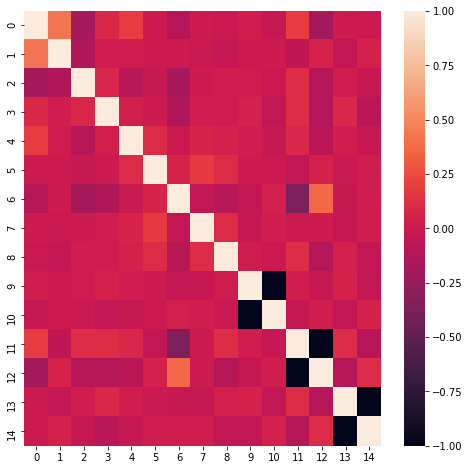

In [49]:
# correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(8,8))         
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

After generating the correlation matrix, we can see that to the right side of the matrix, there are features that has a very high correlation. We usually remove such features that have high correlations because, they are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.

It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.

In order to find the exact columns that has the high correlation values, i perform the below code. I am checking the upper triangle of the correlation matrux because the uppoer and lower traingles are mirrors of each other that are divided by the diagonal in the correlation matrix. Here i am checking the columns that has correlations values more than 0.95 with the hope of removing them.

In [35]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN  0.419629 -0.175419  0.093699  0.179822  0.006550 -0.111516  0.003282   
1  NaN       NaN -0.132871  0.017102  0.014848 -0.000069  0.003739 -0.013037   
2  NaN       NaN       NaN  0.085168 -0.100330 -0.019868 -0.172222  0.004174   
3  NaN       NaN       NaN       NaN  0.034170 -0.004720 -0.125004  0.015954   
4  NaN       NaN       NaN       NaN       NaN  0.108766 -0.014420  0.067740   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.067434  0.174935   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.046518   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

However, after performing the above code, we can see that there are no columns that has more than 0.95 correlation and that therefore, there are no columns to be removed.

Applying PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [36]:
from sklearn.decomposition import PCA

# apllying the PCA for feature reduction

pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.600041,0.322327,-0.314803,-0.540119,-0.282103,-0.041165,-0.486450,-0.343629,-0.761340,0.085336,-0.085336,1.306330,-1.306330,0.402729,-0.402729
1,0.909946,0.322327,-1.853267,-0.427716,-0.282103,-0.041165,1.146179,-0.647517,1.663055,0.085336,-0.085336,-0.765503,0.765503,0.402729,-0.402729
2,0.110541,-1.286401,1.223661,-0.522911,-0.282103,-0.041165,-1.223466,0.264146,-0.761340,0.085336,-0.085336,-0.765503,0.765503,0.402729,-0.402729
3,-1.044155,-1.286401,-0.314803,-0.515954,-0.282103,-0.041165,-0.355840,0.264146,0.450857,0.085336,-0.085336,1.306330,-1.306330,0.402729,-0.402729
4,-0.600041,0.322327,-0.314803,-0.204008,-0.282103,-0.041165,1.034227,-0.343629,1.663055,0.085336,-0.085336,-0.765503,0.765503,0.402729,-0.402729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,-0.155927,-1.286401,-0.314803,-0.524009,-0.282103,-0.681455,-0.337181,-0.647517,0.450857,0.085336,-0.085336,1.306330,-1.306330,0.402729,-0.402729
6192,-0.600041,0.322327,-1.853267,1.902364,-0.282103,1.239416,-1.158160,-0.647517,1.663055,0.085336,-0.085336,1.306330,-1.306330,0.402729,-0.402729
6193,-0.244750,0.322327,-0.314803,-0.456640,-0.282103,-0.041165,1.043557,-0.647517,-0.761340,0.085336,-0.085336,-0.765503,0.765503,0.402729,-0.402729
6194,0.199364,-1.286401,-0.314803,-0.288951,-0.282103,-0.681455,-1.242124,0.264146,0.450857,0.085336,-0.085336,-0.765503,0.765503,0.402729,-0.402729


Here, I have not manually set the n_components of the PCA model. We want the explained variance to be between 95–99%. Therefore, i have set the PCA's n_components to 0.95

## Developing the MultiLayer Perceptron Model

In [37]:
PCA_X_train=np.array(PCA_X_train)
PCA_X_test =np.array(PCA_X_test )
y_train=np.array(y_train)
y_test=np.array(y_test)

In [38]:
#import tensorflow libraries 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [39]:
# determine the number of input features
n_features = PCA_X_train.shape[1]
n_features

11

In [40]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

In [41]:
n_epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / n_epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [42]:
# compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# fit the model
model.fit(PCA_X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)

In [44]:
loss, acc = model.evaluate(PCA_X_test, y_test, verbose=0)
print('Test Accuracy: %.3f ' % (acc * 100.0))

Test Accuracy: 81.806 


<Figure size 576x576 with 0 Axes>

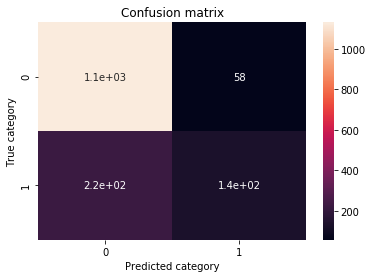

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(PCA_X_test)

# custom classifier 
predictions = model.predict(PCA_X_test)
data = []
for x in predictions:
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

# confusion matrix 
cnf_matrix = confusion_matrix(y_test, data)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, annot=True)
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()  

In [46]:
print('MLP (NN) : \n', classification_report(y_test, data),'\n')

MLP (NN) : 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      1189
           1       0.70      0.38      0.49       361

    accuracy                           0.82      1550
   macro avg       0.77      0.67      0.69      1550
weighted avg       0.80      0.82      0.80      1550
 

